In [ ]:
! pip install descartes
! pip install vecstack
! pip install lifelines

##Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/SpatialAnalyis/katalog_gempa.csv", sep=',')
dataset.head()

Unnamed: 0      eventID                    datetime  latitude   longitude  \
0           0  bmg2008vkye  2008-11-01 00:31:25.143741 -0.604440   98.895531   
1           1  bmg2008vlag  2008-11-01 01:34:29.660856 -6.611860  129.387220   
2           2  bmg2008vlaj  2008-11-01 01:38:14.802129 -3.650586  127.990680   
3           3  bmg2008vlbt  2008-11-01 02:20:05.909515 -4.198925  128.097000   
4           4  bmg2008vlcd  2008-11-01 02:32:18.756155 -4.091891  128.200470   

   magnitude mag_type  depth  phasecount  azimuth_gap          location  \
0   2.989742      MLv     20         6.0    146.70738  Southern Sumatra   
1   5.507549       mb     30        62.0     45.46764         Banda Sea   
2   3.539674      MLv      5         4.0    331.97404             Seram   
3   2.424314      MLv      5         5.0    326.37993         Banda Sea   
4   2.410045      MLv     10         5.0    314.65474         Banda Sea   

       agency  
0   Indonesia  
1         NaN  
2   Indonesia  
3         NaN  
4         NaN

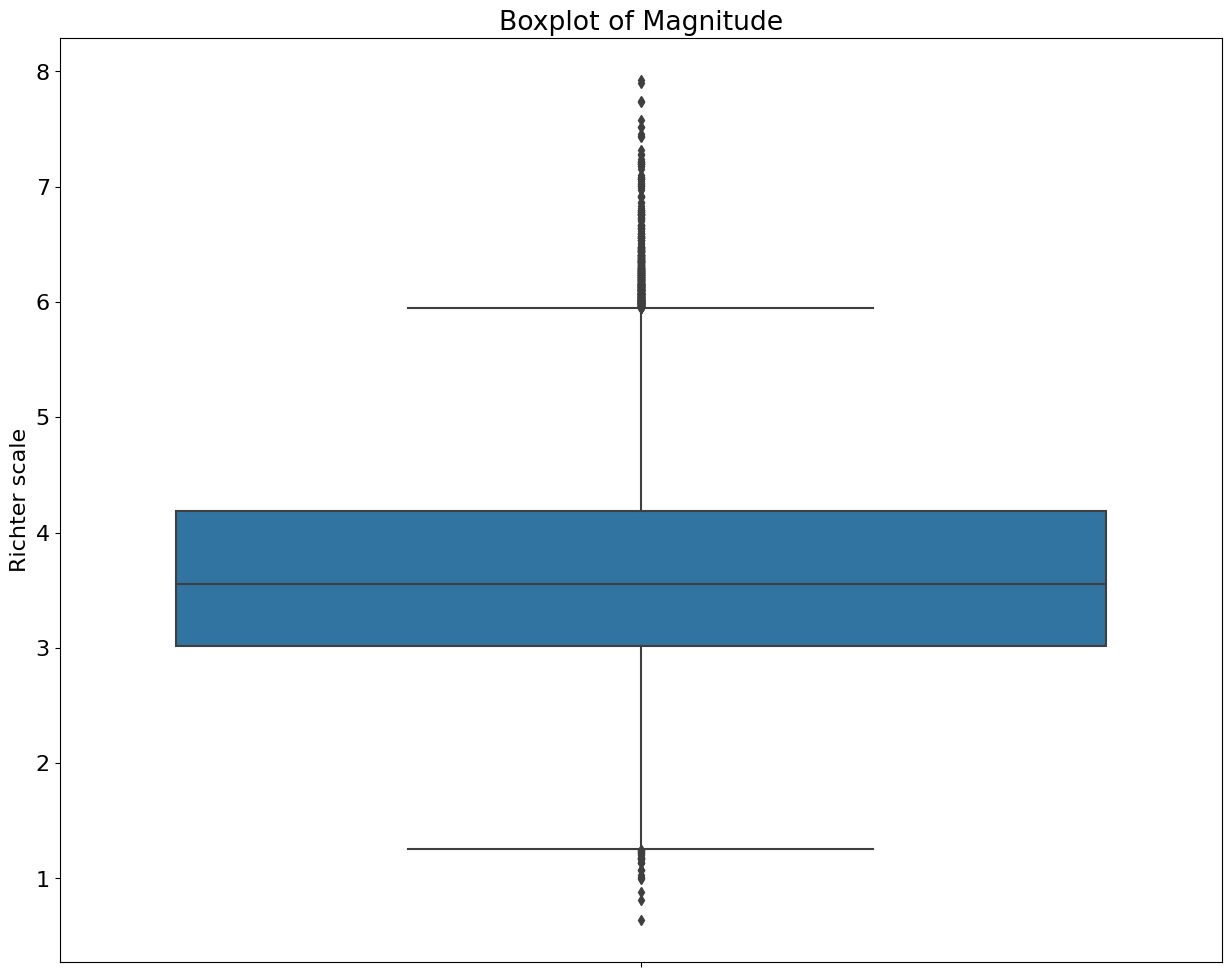

In [ ]:
plt.figure(figsize=(15, 12))
sns.boxplot(data=dataset, y='magnitude')
plt.title('Boxplot of Magnitude')
plt.ylabel('Richter scale')
plt.savefig('Earthquake_Occurrence_boxplot.png')
plt.show()

In [ ]:
empty_values = dataset['magnitude'].isnull()
count_empty = empty_values.sum()
print(f"Number of empty values in 'magnitude': {count_empty}")

Number of empty values in 'magnitude': 512


Because there some missing values on the magnitude feature ang there are some outliers detected on the boxplot. So we should fill the empty row on magnitude feature with median value. Median value is less sensitive to extreme values (Outliers).

In [ ]:
magnitude_median = dataset['magnitude'].median()
dataset['magnitude'].fillna(magnitude_median, inplace=True)

In [ ]:
empty_values = dataset['magnitude'].isnull()
count_empty = empty_values.sum()
print(f"Number of empty values in 'magnitude': {count_empty}")

Number of empty values in 'magnitude': 0


##Data Cleansing

In [ ]:
updated_dataset = dataset.drop(["Unnamed: 0", "agency", "eventID", "mag_type"], axis = 1)
updated_dataset.head()

datetime  latitude   longitude  magnitude  depth  \
0  2008-11-01 00:31:25.143741 -0.604440   98.895531   2.989742     20   
1  2008-11-01 01:34:29.660856 -6.611860  129.387220   5.507549     30   
2  2008-11-01 01:38:14.802129 -3.650586  127.990680   3.539674      5   
3  2008-11-01 02:20:05.909515 -4.198925  128.097000   2.424314      5   
4  2008-11-01 02:32:18.756155 -4.091891  128.200470   2.410045     10   

   phasecount  azimuth_gap          location  
0         6.0    146.70738  Southern Sumatra  
1        62.0     45.46764         Banda Sea  
2         4.0    331.97404             Seram  
3         5.0    326.37993         Banda Sea  
4         5.0    314.65474         Banda Sea

##Data Exploratory Analysis

In [ ]:
updated_dataset[['magnitude', 'depth']].describe()

magnitude          depth
count  102515.000000  102515.000000
mean        3.608151      51.526225
std         0.817375      82.931008
min         0.638354       0.000000
25%         3.015472      10.000000
50%         3.551731      16.000000
75%         4.182638      56.000000
max         7.923472     750.000000

In [ ]:
print (updated_dataset.groupby('location').groups.keys())

dict_keys(['Arafura Sea', 'Aru Islands Region', 'Bali Region', 'Bali Sea', 'Banda Sea', 'Borneo', 'Buru', 'Celebes Sea', 'Ceram Sea', 'East of Philippine Islands', 'Flores Region', 'Flores Sea', 'Halmahera', 'Irian Jaya', 'Irian Jaya Region', 'Java', 'Java Sea', 'Malay Peninsula', 'Minahassa Peninsula', 'Mindanao', 'Near North Coast of Irian Jaya', 'Near North Coast of West Papua', 'Near South Coast of Irian Jaya', 'New Guinea', 'Nicobar Islands', 'North of Halmahera', 'Northern Molucca Sea', 'Northern Sumatra', 'Northwest of Australia', 'Off West Coast of Northern Sumatra', 'Philippine Islands Region', 'Savu Sea', 'Seram', 'South China Sea', 'South Indian Ocean', 'South of Bali', 'South of Java', 'South of Sumba', 'South of Sumbawa', 'Southern Molucca Sea', 'Southern Sumatra', 'Southwest of Sumatra', 'Sulawesi', 'Sulu Archipelago', 'Sumba Region', 'Sumbawa Region', 'Sunda Strait', 'Talaud Islands', 'Tanimbar Islands Reg.', 'Tanimbar Islands Region', 'Timor Region', 'Timor Sea', 'W. Ca

In [ ]:
occurrence = updated_dataset.groupby(['location'])['location'].count()
print (occurrence)

location
Arafura Sea                              14
Aru Islands Region                      149
Bali Region                            1447
Bali Sea                                758
Banda Sea                              5564
Borneo                                  490
Buru                                    112
Celebes Sea                             671
Ceram Sea                              1748
East of Philippine Islands               18
Flores Region                          2691
Flores Sea                             2041
Halmahera                              3971
Irian Jaya                             1706
Irian Jaya Region                      3475
Java                                   7668
Java Sea                                256
Malay Peninsula                          46
Minahassa Peninsula                   10621
Mindanao                                824
Near North Coast of Irian Jaya         1750
Near North Coast of West Papua          448
Near South Coast of Iri

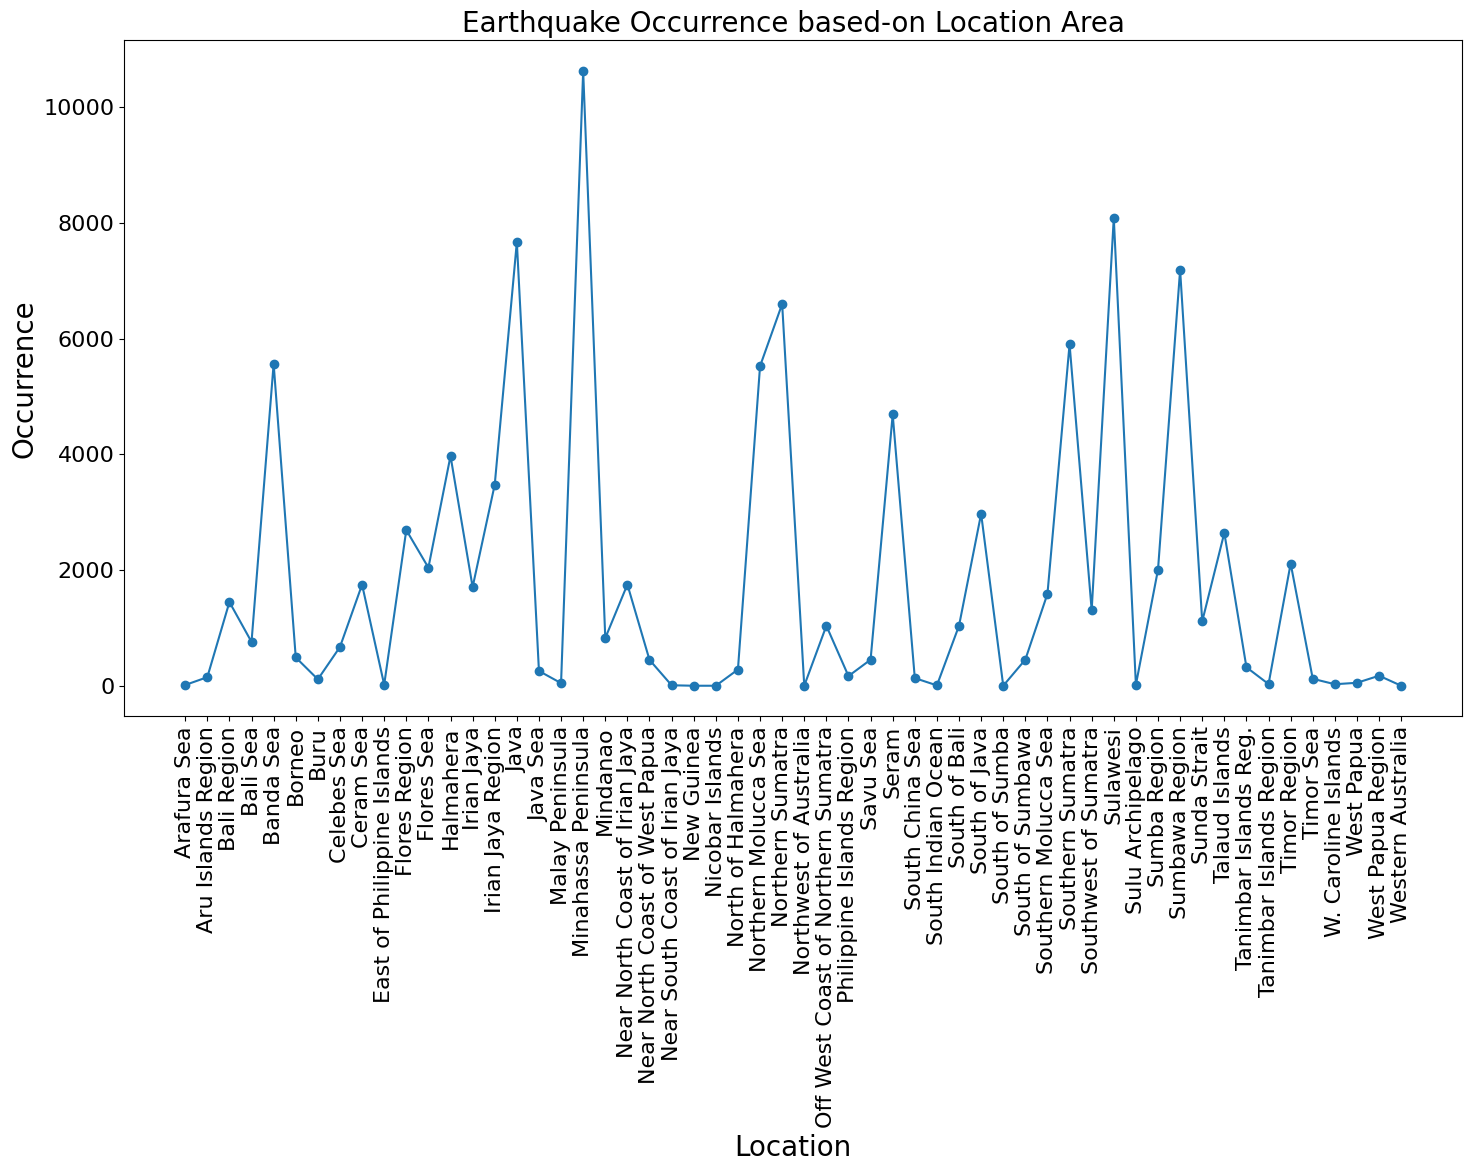

In [ ]:
plt.figure(figsize=(15, 12))

plt.plot(occurrence, marker='o')
plt.xlabel("Location", fontsize=20)
plt.ylabel("Occurrence", fontsize=20)
plt.title("Earthquake Occurrence based-on Location Area", fontsize=20)
plt.rcParams.update({'font.size': 16})
plt.tick_params(axis='x',labelsize=16,rotation=90)
plt.tight_layout()
plt.savefig('Earthquake_Occurrence_based-on_Location_Area.png')
plt.show()

In [ ]:
import datetime
import time

timestamp = []
for d, t in zip(updated_dataset['datetime'], updated_dataset['datetime']):
    try:
      s = t[:t.rfind('.')]
      ts = datetime.datetime.strptime(s, '%Y-%m-%d %H:%M:%S')
      timestamp.append(ts)
    except ValueError:
      print('ValueError')
      timestamp.append('ValueError')

In [ ]:
timeStamp = pd.Series(timestamp)
updated_dataset['Timestamp'] = timeStamp.values
prep_ml_dataset = updated_dataset

In [ ]:
updated_dataset['Timestamp'] = updated_dataset['Timestamp'].astype('datetime64[ns]')
timeseries_dataframe = updated_dataset.drop(['datetime'], axis=1)
timeseries_dataframe = updated_dataset.set_index("Timestamp")
timeseries_dataframe.head()

datetime  latitude   longitude  \
Timestamp                                                               
2008-11-01 00:31:25  2008-11-01 00:31:25.143741 -0.604440   98.895531   
2008-11-01 01:34:29  2008-11-01 01:34:29.660856 -6.611860  129.387220   
2008-11-01 01:38:14  2008-11-01 01:38:14.802129 -3.650586  127.990680   
2008-11-01 02:20:05  2008-11-01 02:20:05.909515 -4.198925  128.097000   
2008-11-01 02:32:18  2008-11-01 02:32:18.756155 -4.091891  128.200470   

                     magnitude  depth  phasecount  azimuth_gap  \
Timestamp                                                        
2008-11-01 00:31:25   2.989742     20         6.0    146.70738   
2008-11-01 01:34:29   5.507549     30        62.0     45.46764   
2008-11-01 01:38:14   3.539674      5         4.0    331.97404   
2008-11-01 02:20:05   2.424314      5         5.0    326.37993   
2008-11-01 02:32:18   2.410045     10         5.0    314.65474   

                             location  
Timestamp                              
2008-11-01 00:31:25  Southern Sumatra  
2008-11-01 01:34:29         Banda Sea  
2008-11-01 01:38:14             Seram  
2008-11-01 02:20:05         Banda Sea  
2008-11-01 02:32:18         Banda Sea

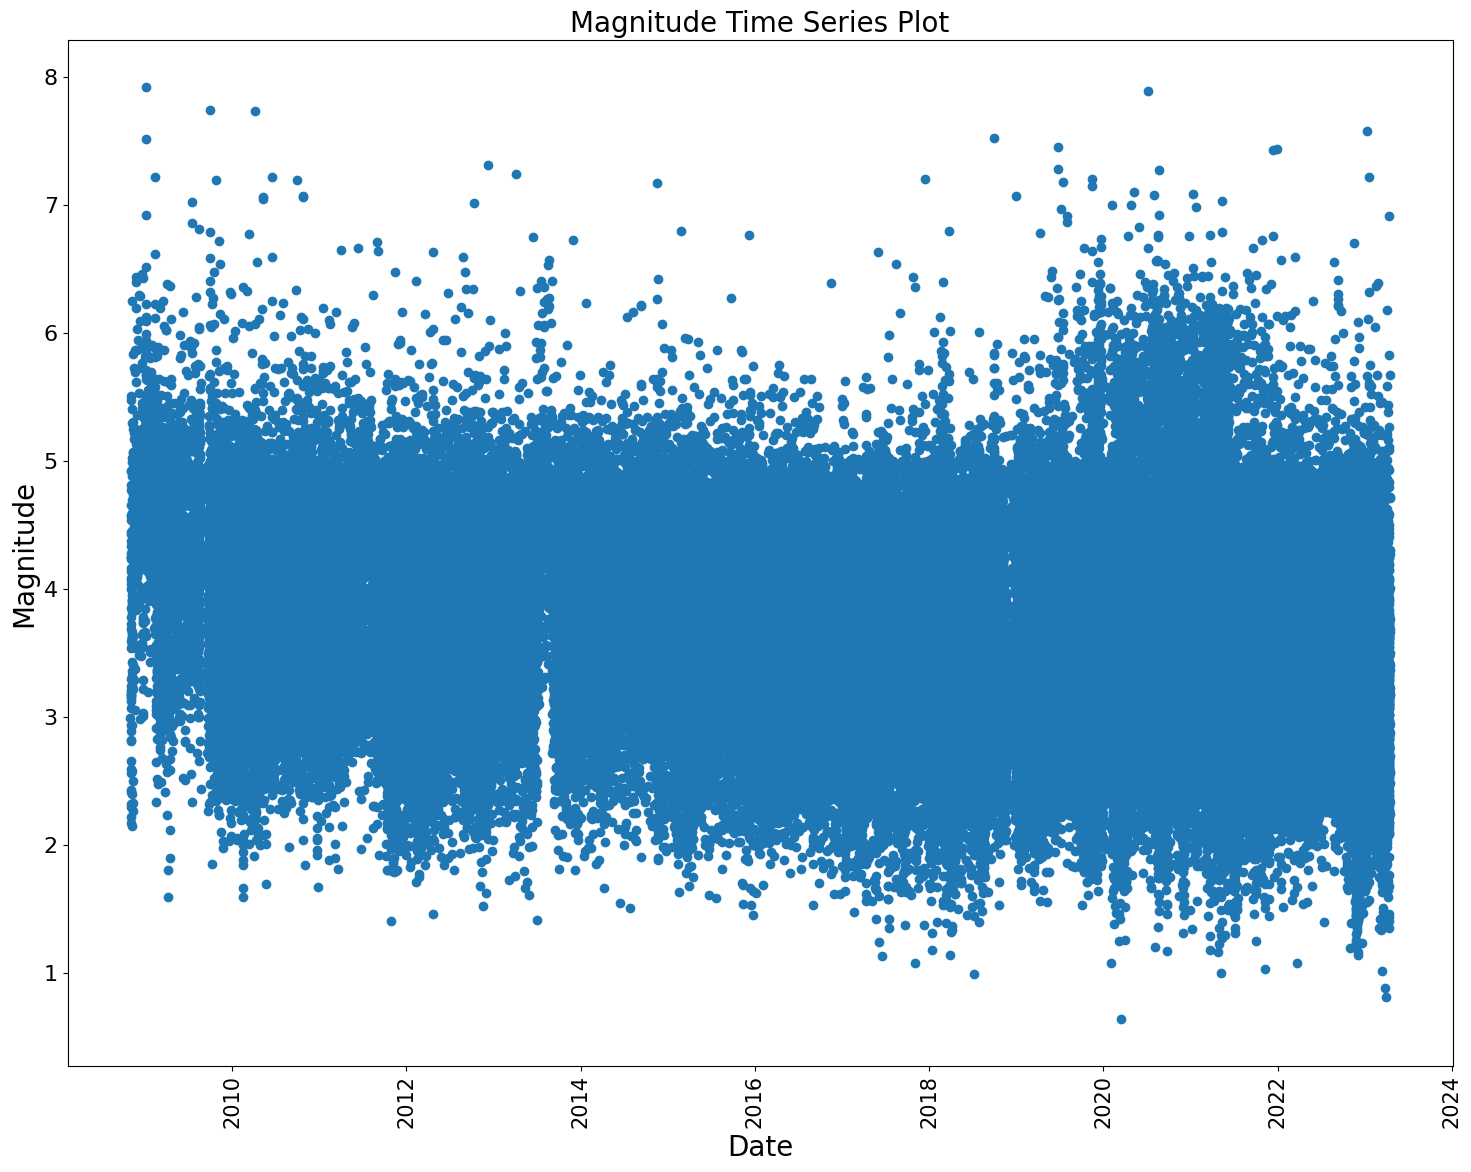

In [ ]:
plt.figure(figsize=(15, 12))
plt.scatter(timeseries_dataframe.index, timeseries_dataframe["magnitude"])
plt.xlabel("Date", fontsize=20)
plt.ylabel("Magnitude", fontsize=20)
plt.title("Magnitude Time Series Plot", fontsize=20)
plt.tick_params(axis='x',labelsize=15,rotation=90)
plt.tight_layout()
plt.savefig('Earthquake_Occurrence_based-on_Year.png')
plt.show()

In [ ]:
print (updated_dataset.loc[updated_dataset['magnitude'].idxmax()])

datetime       2009-01-03 19:43:54.962255
latitude                        -0.539336
longitude                       132.89247
magnitude                        7.923472
depth                                  17
phasecount                          104.0
azimuth_gap                     60.960369
location                Irian Jaya Region
Timestamp             2009-01-03 19:43:54
Name: 333, dtype: object


In [ ]:
print (updated_dataset.loc[updated_dataset['depth'].idxmax()])

datetime       2009-03-07 18:44:57.356027
latitude                        -0.059984
longitude                       123.98734
magnitude                         4.06384
depth                                 750
phasecount                            7.0
azimuth_gap                     109.63029
location              Minahassa Peninsula
Timestamp             2009-03-07 18:44:57
Name: 976, dtype: object


In [ ]:
fig = go.Figure(data=go.Scattergeo(
    lat = updated_dataset.latitude,
    lon = updated_dataset.longitude,
    text = updated_dataset.Timestamp,
    marker = dict(
        color = updated_dataset.magnitude,
        opacity = 0.7,
        size = 3,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
        )
    )
))

fig.update_layout(
    geo = dict(
        scope = 'asia',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ 94.0, 142.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -6.0, 11.0 ],
            dtick = 5
        )
    ),
    title='Map of major earthquakes in Indonesia',
)
fig.show()

In [ ]:
big_quake = updated_dataset[updated_dataset.magnitude>7]

fig_1 = go.Figure(data=go.Scattergeo(
    lat = big_quake.latitude,
    lon = big_quake.longitude,
    text = big_quake.Timestamp,
    marker = dict(
        color = updated_dataset.magnitude,
        opacity = 0.7,
        size = 3,
        colorbar = dict(
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            showticksuffix = "last",
        )
    )
))

fig_1.update_layout(
    geo = dict(
        scope = 'asia',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ 94.0, 142.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ -6.0, 11.0 ],
            dtick = 5
        )
    ),
    title='Map of major earthquakes in Indonesia more than 7 SR',
)
fig_1.show()

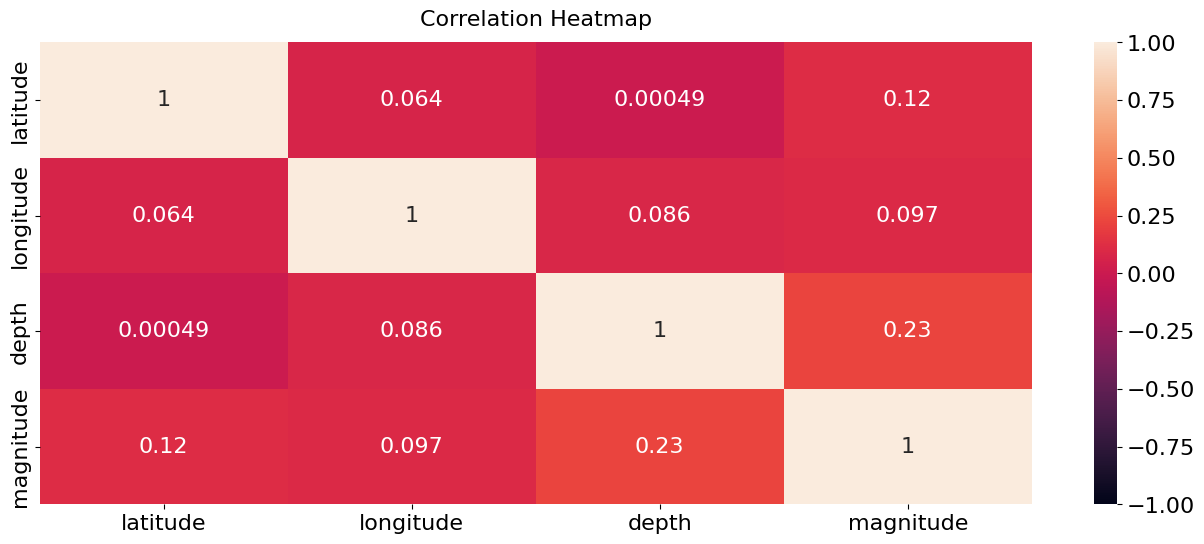

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(updated_dataset[['latitude', 'longitude', 'depth', 'magnitude']].corr(), vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12);
plt.savefig('Correlation_Heatmap.png')

##Machine Learning Process

###Data Cleansing

In [ ]:
ml_dataset = prep_ml_dataset.drop(['datetime'], axis=1)
ml_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102515 entries, 0 to 102514
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   latitude     102515 non-null  float64       
 1   longitude    102515 non-null  float64       
 2   magnitude    102515 non-null  float64       
 3   depth        102515 non-null  int64         
 4   phasecount   102513 non-null  float64       
 5   azimuth_gap  102511 non-null  float64       
 6   location     102512 non-null  object        
 7   Timestamp    102515 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 6.3+ MB


###Feature Engineering
Time cycle extraction process :
This is also known as creating dummy variables and is a widely used method for encoding categorical variables. If you used 1-7 encoding you're telling the model that days 4 and 5 are very similar, while days 1 and 7 are very dissimilar. In fact, days 1 and 7 are just as similar as days 4 and 5. The same logic holds up for 0-30 encoding for days of the month.

https://stats.stackexchange.com/questions/311494/best-practice-for-encoding-datetime-in-machine-learning

In [ ]:
ml_dataset['seconds'] = ml_dataset['Timestamp'].dt.second
ml_dataset['minutes'] = ml_dataset['Timestamp'].dt.minute
ml_dataset['hours'] = ml_dataset['Timestamp'].dt.hour
ml_dataset['day'] = ml_dataset['Timestamp'].dt.day
ml_dataset['month'] = ml_dataset['Timestamp'].dt.month
ml_dataset['year'] = ml_dataset['Timestamp'].dt.year
ml_dataset_clean = ml_dataset.drop(["Timestamp"], axis = 1)

In [ ]:
seconds_in_day = 24*60*60
minutes_in_day = 24*60
hours_in_day = 24

day_in_year = 365
month_in_year = 12


ml_dataset_clean['sin_time_seconds'] = np.sin(2*np.pi*ml_dataset_clean.seconds/seconds_in_day)
ml_dataset_clean['cos_time_seconds'] = np.cos(2*np.pi*ml_dataset_clean.seconds/seconds_in_day)
ml_dataset_clean['sin_time_minutes'] = np.sin(2*np.pi*ml_dataset_clean.minutes/minutes_in_day)
ml_dataset_clean['cos_time_minutes'] = np.cos(2*np.pi*ml_dataset_clean.minutes/minutes_in_day)
ml_dataset_clean['sin_time_hours'] = np.sin(2*np.pi*ml_dataset_clean.hours/hours_in_day)
ml_dataset_clean['cos_time_hours'] = np.cos(2*np.pi*ml_dataset_clean.hours/hours_in_day)
ml_dataset_clean['sin_time_day'] = np.sin(2*np.pi*ml_dataset_clean.day/day_in_year)
ml_dataset_clean['cos_time_day'] = np.cos(2*np.pi*ml_dataset_clean.day/day_in_year)
ml_dataset_clean['sin_time_month'] = np.sin(2*np.pi*ml_dataset_clean.month/month_in_year)
ml_dataset_clean['cos_time_month'] = np.cos(2*np.pi*ml_dataset_clean.month/month_in_year)

ml_dataset_clean.drop('seconds', axis=1, inplace=True)
ml_dataset_clean.drop('minutes', axis=1, inplace=True)
ml_dataset_clean.drop('hours', axis=1, inplace=True)
ml_dataset_clean.drop('day', axis=1, inplace=True)
ml_dataset_clean.drop('month', axis=1, inplace=True)

In [ ]:
ml_dataset_clean['class'] = pd.cut(ml_dataset_clean['magnitude'], bins=[0, 2, 3, 4, 5, 6, 7, 8], include_lowest=True, labels=['ultra mikro', 'mikro', 'light', 'moderate', 'strong', 'severe', 'extreme'])
ml_dataset_clean.head()

latitude   longitude  magnitude  depth  phasecount  azimuth_gap  \
0 -0.604440   98.895531   2.989742     20         6.0    146.70738   
1 -6.611860  129.387220   5.507549     30        62.0     45.46764   
2 -3.650586  127.990680   3.539674      5         4.0    331.97404   
3 -4.198925  128.097000   2.424314      5         5.0    326.37993   
4 -4.091891  128.200470   2.410045     10         5.0    314.65474   

           location  year  sin_time_seconds  cos_time_seconds  \
0  Southern Sumatra  2008          0.001818          0.999998   
1         Banda Sea  2008          0.002109          0.999998   
2             Seram  2008          0.001018          0.999999   
3         Banda Sea  2008          0.000364          1.000000   
4         Banda Sea  2008          0.001309          0.999999   

   sin_time_minutes  cos_time_minutes  sin_time_hours  cos_time_hours  \
0          0.134851          0.990866        0.000000        1.000000   
1          0.147809          0.989016        0.258819        0.965926   
2          0.165048          0.986286        0.258819        0.965926   
3          0.087156          0.996195        0.500000        0.866025   
4          0.139173          0.990268        0.500000        0.866025   

   sin_time_day  cos_time_day  sin_time_month  cos_time_month   class  
0      0.017213      0.999852            -0.5        0.866025   mikro  
1      0.017213      0.999852            -0.5        0.866025  strong  
2      0.017213      0.999852            -0.5        0.866025   light  
3      0.017213      0.999852            -0.5        0.866025   mikro  
4      0.017213      0.999852            -0.5        0.866025   mikro

In [ ]:
class_occurrence = ml_dataset_clean.groupby(['class'])['class'].count()
print (class_occurrence)

class
ultra mikro     1249
mikro          23737
light          45316
moderate       27781
strong          3994
severe           401
extreme           37
Name: class, dtype: int64


In [ ]:
print (ml_dataset_clean.groupby('class').groups.keys())
class_map = {"extreme" : 6,"severe" : 5,"strong" : 4,"moderate" : 3,"light" : 2,"mikro" : 1, "ultra mikro" : 0}
ml_dataset_clean["class"] = ml_dataset_clean["class"].map(class_map)

dict_keys(['ultra mikro', 'mikro', 'light', 'moderate', 'strong', 'severe', 'extreme'])


In [ ]:
X = ml_dataset_clean[['sin_time_seconds', 'cos_time_seconds', 'sin_time_minutes', 'cos_time_minutes', 'sin_time_hours', 'cos_time_hours', 'sin_time_day', 'cos_time_day', 'sin_time_month', 'cos_time_month', 'latitude', 'longitude', 'depth']]
y = ml_dataset_clean[['magnitude']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train.values.ravel())
y_predict = reg.predict(X_test)

In [ ]:
rfr_prediction = pd.DataFrame(y_predict, columns = ['Magnitude'])
rfr_prediction.to_csv('RFR_prediction.csv', sep='\t', encoding='utf-8')

In [ ]:
print('Training Score:', reg.score(X_train, y_train))
print('Test Score:', reg.score(X_test, y_test))

Training Score: 0.9203108437086119
Test Score: 0.42506784701610234


In [ ]:
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict))
print("RMSE: ", rmse)

MAE:  0.4818777074049107
MSE:  0.38492444410169674
RMSE:  0.62


In [ ]:
from sklearn.model_selection import cross_val_score
print('R2 Score:', cross_val_score(reg, X, y.values.ravel(), cv=10, scoring="r2").mean())

R2 Score: 0.3206481417150745


In [ ]:
adjusted_r2 = 1 - (1-reg.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)
print('Adjusted R2 Score:', adjusted_r2)

Adjusted R2 Score: 0.8210296338503147


###Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) # compute the mean and standard deviation to be used for later scaling
X_train_scaled = scaler.transform(X_train)

svr = SVR(kernel = 'rbf', tol = 0.01, C= 2, gamma=0.02)
svr.fit(X_train, y_train.values.ravel())
y_predict = svr.predict(X_test)
print('Training Score:', svr.score(X_train, y_train))
print('Test Score:', svr.score(X_test, y_test))

Training Score: 0.394112531603937
Test Score: 0.33895937606552173


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict))
print("RMSE: ", rmse)

MAE:  0.5114106785570172
MSE:  0.44044352761511
RMSE:  0.664


In [ ]:
from sklearn.model_selection import cross_val_score

adjusted_r2 = 1 - (1-svr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R2 Score:', cross_val_score(svr, X, y.values.ravel(), cv=10, scoring="r2").mean())
print('Adjusted R2 Score:', adjusted_r2)

R2 Score: 0.2656429339103214
Adjusted R2 Score: 0.38303438174261706


In [ ]:
svr_prediction = pd.DataFrame(y_predict, columns = ['Magnitude'])
svr_prediction.to_csv('RFR_prediction.csv', sep='\t', encoding='utf-8')

###Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train.values.ravel())
X_train_scaled = scaler.transform(X_train)

dtr = DecisionTreeRegressor(random_state = 2)
dtr.fit(X_train, y_train.values.ravel())

y_predict = dtr.predict(X_test)
print('Training Score:', dtr.score(X_train, y_train))
print('Test Score:', dtr.score(X_test, y_test))

Training Score: 1.0
Test Score: -0.17075517644411198


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict))
print("RMSE: ", rmse)

MAE:  0.6772820744116909
MSE:  0.7736524607082138
RMSE:  0.88


In [ ]:
from sklearn.model_selection import cross_val_score

adjusted_r2 = 1 - (1-dtr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R2 Score:', cross_val_score(dtr, X, y.values.ravel(), cv=10, scoring="r2").mean())
print('Adjusted R2 Score:', adjusted_r2)

R2 Score: -0.33833512451558223
Adjusted R2 Score: 0.7683713154667896


###K-Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train, y_train.values.ravel())
X_train_scaled = scaler.transform(X_train)

knr = KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train.values.ravel())

y_predict = knr.predict(X_test)
print('Training Score:', knr.score(X_train, y_train))
print('Test Score:', knr.score(X_test, y_test))

Training Score: 0.7149658175567624
Test Score: 0.12884996720850428


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

rmse = float(format(np.sqrt(mean_squared_error(y_test, y_predict)), '.3f'))
print('MAE: ', mean_absolute_error(y_test, y_predict))
print('MSE: ', mean_squared_error(y_test, y_predict))
print("RMSE: ", rmse)

MAE:  0.5889937843716188
MSE:  0.5804369347847166
RMSE:  0.762


In [ ]:
from sklearn.model_selection import cross_val_score

adjusted_r2 = 1 - (1-knr.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

print('R2 Score:', cross_val_score(knr, X, y.values.ravel(), cv=10, scoring="r2").mean())
print('Adjusted R2 Score:', adjusted_r2)

R2 Score: -0.01124676873553343
Adjusted R2 Score: 0.5980092259203813


###Ensemble Method :
Stacking is a machine learning ensemble technique that learns how to aggregate predictions from numerous high-performing machine learning models.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from vecstack import stacking

model_1 = LinearRegression()
model_2 = xgb.XGBRegressor(objective ='reg:squarederror',
                           colsample_bytree = 0.3,
                           learning_rate = 0.1,
                           max_depth = 7,
                           alpha = 10,
                           n_estimators = 7)
model_3 = RandomForestRegressor()
model_4 = SVR(kernel = 'rbf', tol = 0.01, C= 2, gamma=0.02)

# all_models = [model_1, model_2, model_3, model_1, model_4]

all_models = [model_1, model_3, model_3, model_4, model_4]

S_train, S_test = stacking(all_models, X_train, y_train, X_test, regression=True, shuffle = True, verbose=2)

# initializing the second-level model
final_model = model_1

# fitting the second level model with stack features
final_model = final_model.fit(S_train, y_train.values.ravel())

# predicting the final output using stacking
pred_final = final_model.predict(X_test[['sin_time_day', 'cos_time_day', 'latitude', 'longitude', 'depth']])

#printing the mean squared error between real value and predicted value
rmse = float(format(np.sqrt(mean_squared_error(y_test, pred_final)), '.3f'))
print("RMSE: ", rmse)

adjusted_r2 = 1 - (1-final_model.score(S_train, y_train.values.ravel()))*(len(y)-1)/(len(y)-X.shape[1]-1)
print('R2 Score:', cross_val_score(final_model, S_train, y_train.values.ravel(), cv=10, scoring="r2").mean())
print('Adjusted R2 Score:', adjusted_r2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



task:         [regression]
metric:       [mean_absolute_error]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [LinearRegression]
    fold  0:  [0.62711598]
    fold  1:  [0.62954030]
    fold  2:  [0.62519284]
    fold  3:  [0.62682309]
    ----
    MEAN:     [0.62716805] + [0.00155328]
    FULL:     [0.62716805]

model  1:     [RandomForestRegressor]
    fold  0:  [0.48007056]
    fold  1:  [0.48634702]
    fold  2:  [0.48412596]
    fold  3:  [0.48582362]
    ----
    MEAN:     [0.48409179] + [0.00246256]
    FULL:     [0.48409179]

model  2:     [RandomForestRegressor]
    fold  0:  [0.48127789]
    fold  1:  [0.48626082]
    fold  2:  [0.48330605]
    fold  3:  [0.48639040]
    ----
    MEAN:     [0.48430879] + [0.00214099]
    FULL:     [0.48430879]

model  3:     [SVR]
    fold  0:  [0.50904683]
    fold  1:  [0.51322558]
    fold  2:  [0.51287456]
    fold  3:  [0.51230163]
    ----
    MEAN:     [0.51186215] + [0.00165855]
    FULL:     [0.51186215]

model  4:   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



R2 Score: 0.42638118326505836
Adjusted R2 Score: 0.42645110295722166


##Classification Analysis

In [ ]:
ml_dataset_clean.head()

latitude   longitude  magnitude  depth  phasecount  azimuth_gap  \
0 -0.604440   98.895531   2.989742     20         6.0    146.70738   
1 -6.611860  129.387220   5.507549     30        62.0     45.46764   
2 -3.650586  127.990680   3.539674      5         4.0    331.97404   
3 -4.198925  128.097000   2.424314      5         5.0    326.37993   
4 -4.091891  128.200470   2.410045     10         5.0    314.65474   

           location  year  sin_time_seconds  cos_time_seconds  \
0  Southern Sumatra  2008          0.001818          0.999998   
1         Banda Sea  2008          0.002109          0.999998   
2             Seram  2008          0.001018          0.999999   
3         Banda Sea  2008          0.000364          1.000000   
4         Banda Sea  2008          0.001309          0.999999   

   sin_time_minutes  cos_time_minutes  sin_time_hours  cos_time_hours  \
0          0.134851          0.990866        0.000000        1.000000   
1          0.147809          0.989016        0.258819        0.965926   
2          0.165048          0.986286        0.258819        0.965926   
3          0.087156          0.996195        0.500000        0.866025   
4          0.139173          0.990268        0.500000        0.866025   

   sin_time_day  cos_time_day  sin_time_month  cos_time_month class  
0      0.017213      0.999852            -0.5        0.866025     1  
1      0.017213      0.999852            -0.5        0.866025     4  
2      0.017213      0.999852            -0.5        0.866025     2  
3      0.017213      0.999852            -0.5        0.866025     1  
4      0.017213      0.999852            -0.5        0.866025     1

In [ ]:
X_class = ml_dataset_clean[['sin_time_seconds', 'cos_time_seconds', 'sin_time_minutes', 'cos_time_minutes', 'sin_time_hours', 'cos_time_hours', 'sin_time_day', 'cos_time_day', 'sin_time_month', 'cos_time_month', 'latitude', 'longitude', 'depth', 'magnitude']]
y_class = ml_dataset_clean[['class']]

In [ ]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class,test_size=0.2)

In [ ]:
print("X train shape : "+str(X_class_train.shape))
print("Y train shape : "+str(y_class_train.shape))
print("X test shape : "+str(X_class_test.shape))
print("Y test shape : "+str(y_class_test.shape))

X train shape : (82012, 14)
Y train shape : (82012, 1)
X test shape : (20503, 14)
Y test shape : (20503, 1)


###Decision Trees

In [ ]:
from sklearn import tree

clf  = tree.DecisionTreeClassifier()
clf = clf.fit(X_class_train, y_class_train.values.ravel())
y_pred = clf.predict(X_class_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_class_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00      4747
           2       1.00      1.00      1.00      9060
           3       1.00      1.00      1.00      5548
           4       1.00      1.00      1.00       783
           5       1.00      1.00      1.00        85
           6       1.00      1.00      1.00         7

    accuracy                           1.00     20503
   macro avg       1.00      1.00      1.00     20503
weighted avg       1.00      1.00      1.00     20503



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_class_test, y_pred))

cf_matrix = confusion_matrix(y_class_test, y_pred)

sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy: 1.0
Sensitivity :  1.0
Specificity :  1.0


###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_class_train, y_class_train.values.ravel())
y_pred = clf.predict(X_class_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_class_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       273
           1       1.00      1.00      1.00      4747
           2       1.00      1.00      1.00      9060
           3       0.99      1.00      1.00      5548
           4       0.95      1.00      0.98       783
           5       1.00      0.15      0.27        85
           6       0.00      0.00      0.00         7

    accuracy                           1.00     20503
   macro avg       0.85      0.73      0.74     20503
weighted avg       1.00      1.00      0.99     20503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_class_test, y_pred))

cf_matrix = confusion_matrix(y_class_test, y_pred)

sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy: 0.9952689850265815
Sensitivity :  0.9413919413919414
Specificity :  1.0


###Support Vector Machine

In [ ]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_class_train, y_class_train.values.ravel())
y_pred = clf.predict(X_class_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_class_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       273
           1       0.85      0.32      0.46      4747
           2       0.63      0.95      0.75      9060
           3       0.73      0.66      0.69      5548
           4       0.00      0.00      0.00       783
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00         7

    accuracy                           0.67     20503
   macro avg       0.32      0.28      0.27     20503
weighted avg       0.67      0.67      0.63     20503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_class_test, y_pred))

cf_matrix = confusion_matrix(y_class_test, y_pred)

sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy: 0.6707798858703604
Sensitivity :  0.0
Specificity :  1.0


###K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=7)
neigh.fit(X_class_train, y_class_train.values.ravel())
y_pred = neigh.predict(X_class_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_class_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.19      0.31       273
           1       0.76      0.70      0.73      4747
           2       0.69      0.83      0.76      9060
           3       0.74      0.66      0.70      5548
           4       0.60      0.19      0.28       783
           5       0.56      0.06      0.11        85
           6       0.00      0.00      0.00         7

    accuracy                           0.72     20503
   macro avg       0.60      0.38      0.41     20503
weighted avg       0.72      0.72      0.71     20503



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_class_test, y_pred))

cf_matrix = confusion_matrix(y_class_test, y_pred)

sensitivity1 = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy: 0.7179437155538214
Sensitivity :  0.19622641509433963
Specificity :  0.9973094170403587


##Survival Analysis

###Data Cleansing

In [ ]:
survival_data_prep = prep_ml_dataset.drop(['datetime'], axis=1)
survival_data = survival_data_prep[survival_data_prep['magnitude'] > 7]
survival_data = survival_data.reset_index()
survival_data.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location           Timestamp  
0  Irian Jaya Region 2009-01-03 19:43:54  
1  Irian Jaya Region 2009-01-03 22:33:45  
2     Talaud Islands 2009-02-11 17:34:56  
3     Sumbawa Region 2009-07-15 09:58:06  
4   Southern Sumatra 2009-09-30 10:16:10

In [ ]:
survival_data.shape


(37, 9)

In [ ]:
import warnings

survival_data['Timestamp'] = survival_data['Timestamp'].dt.strftime('%Y/%m/%d')
survival_data.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location   Timestamp  
0  Irian Jaya Region  2009/01/03  
1  Irian Jaya Region  2009/01/03  
2     Talaud Islands  2009/02/11  
3     Sumbawa Region  2009/07/15  
4   Southern Sumatra  2009/09/30

In [ ]:
survival_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        37 non-null     int64  
 1   latitude     37 non-null     float64
 2   longitude    37 non-null     float64
 3   magnitude    37 non-null     float64
 4   depth        37 non-null     int64  
 5   phasecount   37 non-null     float64
 6   azimuth_gap  37 non-null     float64
 7   location     37 non-null     object 
 8   Timestamp    37 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 2.7+ KB


In [ ]:
survival_data['Timestamp']= pd.to_datetime(survival_data['Timestamp'])
survival_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        37 non-null     int64         
 1   latitude     37 non-null     float64       
 2   longitude    37 non-null     float64       
 3   magnitude    37 non-null     float64       
 4   depth        37 non-null     int64         
 5   phasecount   37 non-null     float64       
 6   azimuth_gap  37 non-null     float64       
 7   location     37 non-null     object        
 8   Timestamp    37 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 2.7+ KB


In [ ]:
survival_data.sort_values('Timestamp', ascending=True, inplace=True)
survival_data['time_in_day'] = survival_data['Timestamp'] - survival_data['Timestamp'].shift()
survival_data.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location  Timestamp time_in_day  
0  Irian Jaya Region 2009-01-03         NaT  
1  Irian Jaya Region 2009-01-03      0 days  
2     Talaud Islands 2009-02-11     39 days  
3     Sumbawa Region 2009-07-15    154 days  
4   Southern Sumatra 2009-09-30     77 days

In [ ]:
survival_data.to_csv('survival_data.csv')

In [ ]:
survival_data = pd.read_csv("/content/survival_data.csv", sep=',', index_col=[0])
survival_data.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location   Timestamp time_in_day  
0  Irian Jaya Region  2009-01-03         NaN  
1  Irian Jaya Region  2009-01-03      0 days  
2     Talaud Islands  2009-02-11     39 days  
3     Sumbawa Region  2009-07-15    154 days  
4   Southern Sumatra  2009-09-30     77 days

In [ ]:
survival_data.isnull().sum()

index          0
latitude       0
longitude      0
magnitude      0
depth          0
phasecount     0
azimuth_gap    0
location       0
Timestamp      0
time_in_day    1
dtype: int64

In [ ]:
survival_data["time_in_day"].fillna(0, inplace = True)
survival_data.isnull().sum()

index          0
latitude       0
longitude      0
magnitude      0
depth          0
phasecount     0
azimuth_gap    0
location       0
Timestamp      0
time_in_day    0
dtype: int64

In [ ]:
survival_data['time_in_day'] = survival_data['time_in_day'].astype('string')
survival_data['time_in_day'] = survival_data['time_in_day'].str.replace("days", "")
survival_data['time_in_day'] = survival_data['time_in_day'].astype(int)
survival_data['earthquake'] = 1
survival_data.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location   Timestamp  time_in_day  earthquake  
0  Irian Jaya Region  2009-01-03            0           1  
1  Irian Jaya Region  2009-01-03            0           1  
2     Talaud Islands  2009-02-11           39           1  
3     Sumbawa Region  2009-07-15          154           1  
4   Southern Sumatra  2009-09-30           77           1

###Data Aggregation

In [ ]:
survival_data_agg_prep = prep_ml_dataset.drop(['datetime'], axis=1)
survival_data_agg = survival_data_agg_prep[survival_data_prep['magnitude'] > 7].iloc[:20]
survival_data_agg = survival_data_agg.reset_index()
survival_data_agg.shape

(20, 9)

In [ ]:
survival_data_agg['Timestamp'] = survival_data_agg['Timestamp'].dt.strftime('%Y/%m/%d')
survival_data_agg.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location   Timestamp  
0  Irian Jaya Region  2009/01/03  
1  Irian Jaya Region  2009/01/03  
2     Talaud Islands  2009/02/11  
3     Sumbawa Region  2009/07/15  
4   Southern Sumatra  2009/09/30

In [ ]:
survival_data_agg['Timestamp']= pd.to_datetime(survival_data_agg['Timestamp'])
survival_data_agg.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location  Timestamp  
0  Irian Jaya Region 2009-01-03  
1  Irian Jaya Region 2009-01-03  
2     Talaud Islands 2009-02-11  
3     Sumbawa Region 2009-07-15  
4   Southern Sumatra 2009-09-30

In [ ]:
survival_data_agg.sort_values('Timestamp', ascending=True, inplace=True)
survival_data_agg['time_in_day'] = survival_data_agg['Timestamp'] - survival_data_agg['Timestamp'].shift()
survival_data_agg.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location  Timestamp time_in_day  
0  Irian Jaya Region 2009-01-03         NaT  
1  Irian Jaya Region 2009-01-03      0 days  
2     Talaud Islands 2009-02-11     39 days  
3     Sumbawa Region 2009-07-15    154 days  
4   Southern Sumatra 2009-09-30     77 days

In [ ]:
survival_data_agg.to_csv('survival_data_agg.csv')

In [ ]:
survival_data_agg = pd.read_csv("/content/survival_data_agg.csv", sep=',', index_col=[0])
survival_data_agg["time_in_day"].fillna(0, inplace = True)
survival_data_agg['time_in_day'] = survival_data_agg['time_in_day'].astype('string')
survival_data_agg['time_in_day'] = survival_data_agg['time_in_day'].str.replace("days", "")
survival_data_agg['time_in_day'] = survival_data_agg['time_in_day'].astype(int)
survival_data_agg['earthquake'] = 0
survival_data_agg.head()

index  latitude  longitude  magnitude  depth  phasecount  azimuth_gap  \
0    333 -0.539336  132.89247   7.923472     17       104.0    60.960369   
1    347 -0.818942  133.41241   7.518514     51       104.0    59.495991   
2    607  3.845437  126.68887   7.216201     64        94.0    73.427807   
3   1948 -8.918530  117.97038   7.021947    244         7.0   137.888090   
4   2443 -0.796806   99.88089   7.742976     81       154.0    37.883636   

            location   Timestamp  time_in_day  earthquake  
0  Irian Jaya Region  2009-01-03            0           0  
1  Irian Jaya Region  2009-01-03            0           0  
2     Talaud Islands  2009-02-11           39           0  
3     Sumbawa Region  2009-07-15          154           0  
4   Southern Sumatra  2009-09-30           77           0

In [ ]:
final_survival_data = pd.concat([survival_data, survival_data_agg])

print("Number of rows both of test dataset :", final_survival_data[final_survival_data.columns[0]].count())

Number of rows both of test dataset : 57


###Data Exploratory

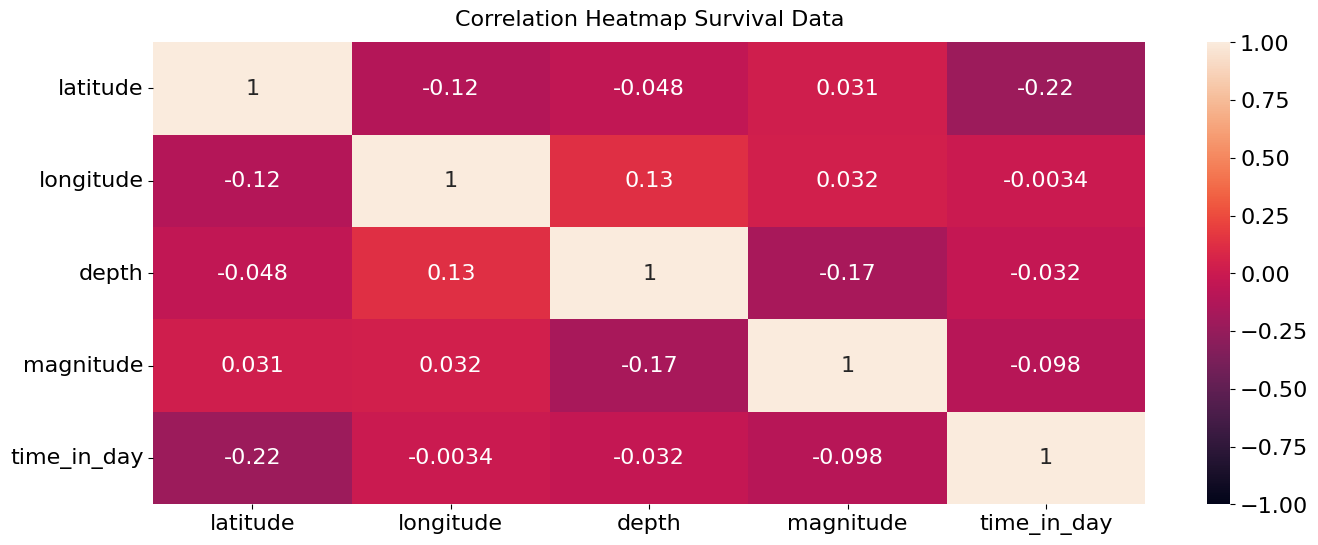

In [ ]:
import seaborn as sns

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(final_survival_data[['latitude', 'longitude', 'depth', 'magnitude', 'time_in_day']].corr(), vmin=-1, vmax=1, annot=True);
heatmap.set_title('Correlation Heatmap Survival Data', fontdict={'fontsize':16}, pad=12);
plt.savefig('Correlation_Heatmap_Survival_Data.png')

In [ ]:
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.plotting import plot_lifetimes
%matplotlib inline

<Axes: xlabel='timeline'>

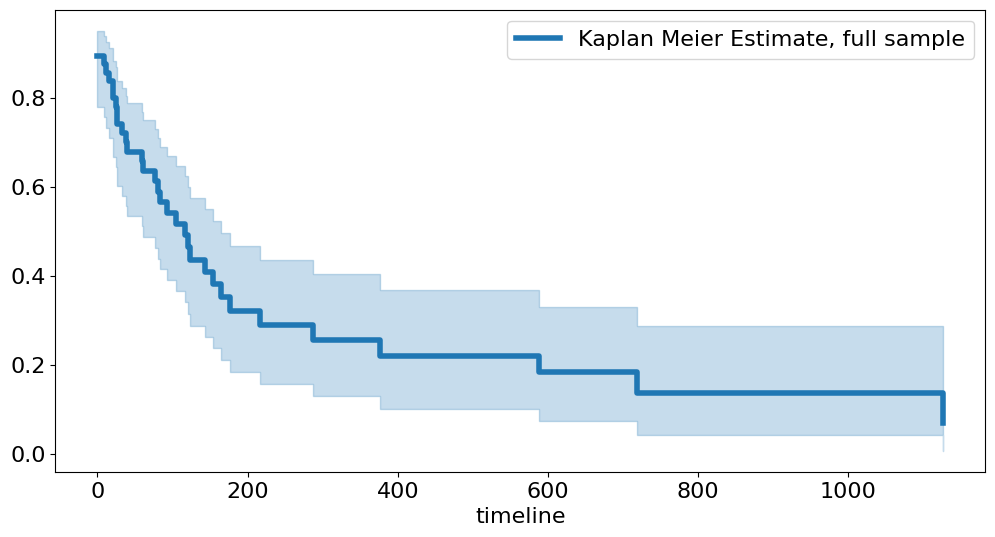

In [ ]:
kmf = KaplanMeierFitter()

kmf.fit(final_survival_data['time_in_day'], final_survival_data['earthquake'], label = 'Kaplan Meier Estimate, full sample')

kmf.plot(linewidth=4, figsize=(12, 6))

In [ ]:
kmf.survival_function_

Kaplan Meier Estimate, full sample
timeline                                    
0.0                                 0.894737
9.0                                 0.875700
11.0                                0.856663
15.0                                0.837626
20.0                                0.799552
24.0                                0.780515
26.0                                0.741489
33.0                                0.721449
38.0                                0.700836
39.0                                0.679599
59.0                                0.657676
61.0                                0.634998
77.0                                0.612319
80.0                                0.588769
83.0                                0.565218
92.0                                0.541667
105.0                               0.517046
117.0                               0.491194
120.0                               0.463905
123.0                               0.436616
143.0                               0.409328
154.0                               0.382039
164.0                               0.352652
177.0                               0.320593
217.0                               0.288533
287.0                               0.256474
376.0                               0.219835
588.0                               0.183196
718.0                               0.137397
1126.0                              0.068698

In [ ]:
from lifelines.statistics import logrank_test

logrank_test_result = logrank_test(
    final_survival_data['time_in_day'],
    final_survival_data['earthquake']
)

logrank_test_result.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
          61.52 <0.005     47.69

<Axes: xlabel='timeline'>

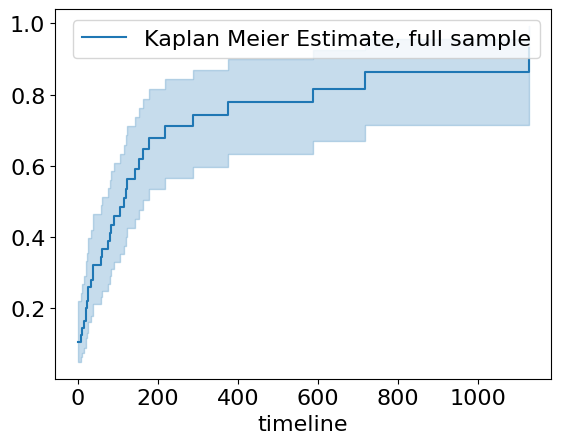

In [ ]:
kmf.plot_cumulative_density()